In [1]:
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
my_options = webdriver.ChromeOptions()
my_options.add_argument("--disable-popup-blocking") #禁用彈出攔截
my_options.add_argument("--disable-notifications")
my_options.add_argument("--incognito") #取消通知
my_options.add_argument("--start-maximized") 

In [3]:
driver=webdriver.Chrome(
    executable_path='./chromedriver',
    options=my_options

)



In [4]:
driver.get('https://www.google.com')

In [5]:
time.sleep(2)
driver.find_element(
    By.CSS_SELECTOR,
    "input[title='Google 搜尋']"
).send_keys('TSLA yahoo finance')
time.sleep(1)

In [6]:
driver.find_elements(
    By.CSS_SELECTOR,
    "div.OBMEnb > ul > li"
)[0].click()
time.sleep(2)

In [7]:
driver.find_elements(
    By.CSS_SELECTOR,
    "Div.yuRUbf > a"
)[0].click()
time.sleep(2)

In [8]:
driver.find_elements(
    By.CSS_SELECTOR,
    "div[id='quote-nav'] > ul > li"
)[4].click()
time.sleep(2)

In [9]:
driver.find_element(
    By.CSS_SELECTOR,
    "div[data-test='dropdown']  > div > span"
).click()
time.sleep(2)

In [10]:
driver.find_element(
    By.CSS_SELECTOR,
    "div[data-test='date-picker-menu'] > ul:nth-child(2)> li:nth-child(4)"
).click()
time.sleep(2)

In [11]:
# driver.find_element(
#     By.CSS_SELECTOR,
#     "div[data-test='date-picker-menu'] >div >button:nth-child(1)"
# ).click()
# time.sleep(2)

driver.find_elements(
    By.CSS_SELECTOR,
    "button >span"
)[1].click()
time.sleep(2)

In [12]:
end=driver.find_element(
    By.CSS_SELECTOR,
    "tfoot > tr > td > span"
)
time.sleep(2)

In [13]:
# SCROLL_PAUSE_TIME = 2

# # Get scroll height
# last_height = driver.execute_script("return document.body.scrollHeight")

# while True:
#     # Scroll down to bottom
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

#     # Wait to load page
#     time.sleep(SCROLL_PAUSE_TIME)

#     # Calculate new scroll height and compare with last scroll height
#     new_height = driver.execute_script("return document.body.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height

In [14]:
actions = ActionChains(driver)
actions.move_to_element(end).perform()
time.sleep(1)

In [15]:
th=driver.find_elements(
    By.CSS_SELECTOR,
    "table[data-test='historical-prices'] > thead > tr >th >span"
)
time.sleep(1)
header=[h.text for h in th]
header

['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

In [16]:
df=pd.DataFrame(columns=header)
df

,Date,Open,High,Low,Close*,Adj Close**,Volume


In [17]:
rows=driver.find_elements(
    By.CSS_SELECTOR,
    "table[data-test='historical-prices'] > tbody > tr"
)
time.sleep(2)
len(rows)

100

In [18]:
for row in rows:
    col=[]
    cols=row.find_elements(
        By.CSS_SELECTOR,
        "td > span"
    )
    for td in cols:
        col.append(td.text)
    if len(col)<7:
        continue
    df.loc[len(df)]=col
df
    
        
        

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 26, 2022",297.43,302.00,287.47,288.09,288.09,"55,966,452"
1,"Aug 25, 2022",302.36,302.96,291.60,296.07,296.07,"52,742,375"
2,"Aug 24, 2022",297.56,303.65,296.50,297.10,297.10,"57,259,716"
3,"Aug 23, 2022",291.45,298.83,287.92,296.45,296.45,"63,985,044"
4,"Aug 22, 2022",291.91,292.40,286.30,289.91,289.91,"55,843,347"
...,...,...,...,...,...,...,...
94,"Apr 12, 2022",332.55,340.40,325.53,328.98,328.98,"65,976,096"
95,"Apr 11, 2022",326.80,336.16,324.88,325.31,325.31,"59,357,205"
96,"Apr 08, 2022",347.74,349.48,340.81,341.83,341.83,"55,013,688"
97,"Apr 07, 2022",350.80,358.86,340.51,352.42,352.42,"79,447,059"


In [19]:
df=df[-1::-1]
df=df.reset_index(drop=True)
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 06, 2022",357.82,359.67,342.57,348.59,348.59,"89,348,535"
1,"Apr 07, 2022",350.80,358.86,340.51,352.42,352.42,"79,447,059"
2,"Apr 08, 2022",347.74,349.48,340.81,341.83,341.83,"55,013,688"
3,"Apr 11, 2022",326.80,336.16,324.88,325.31,325.31,"59,357,205"
4,"Apr 12, 2022",332.55,340.40,325.53,328.98,328.98,"65,976,096"
...,...,...,...,...,...,...,...
94,"Aug 22, 2022",291.91,292.40,286.30,289.91,289.91,"55,843,347"
95,"Aug 23, 2022",291.45,298.83,287.92,296.45,296.45,"63,985,044"
96,"Aug 24, 2022",297.56,303.65,296.50,297.10,297.10,"57,259,716"
97,"Aug 25, 2022",302.36,302.96,291.60,296.07,296.07,"52,742,375"


In [20]:
df=df[['Date','Close*']]
df

,Date,Close*
0,"Apr 06, 2022",348.59
1,"Apr 07, 2022",352.42
2,"Apr 08, 2022",341.83
3,"Apr 11, 2022",325.31
4,"Apr 12, 2022",328.98
...,...,...
94,"Aug 22, 2022",289.91
95,"Aug 23, 2022",296.45
96,"Aug 24, 2022",297.10
97,"Aug 25, 2022",296.07


In [21]:
df=df.dropna()
df

,Date,Close*
0,"Apr 06, 2022",348.59
1,"Apr 07, 2022",352.42
2,"Apr 08, 2022",341.83
3,"Apr 11, 2022",325.31
4,"Apr 12, 2022",328.98
...,...,...
94,"Aug 22, 2022",289.91
95,"Aug 23, 2022",296.45
96,"Aug 24, 2022",297.10
97,"Aug 25, 2022",296.07


In [56]:
driver.close()

In [57]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [58]:
dataset=np.array(df['Close*'])
dataset=dataset.reshape(dataset.shape[0],1)
scaler=StandardScaler()
dataset=scaler.fit_transform(dataset)

In [59]:
dataset.shape

(99, 1)

In [60]:
training_len=int(len(dataset)*0.8)
training_len

79

In [66]:
y_train=[]
X_train=[]
for i in range(6, training_len):
    y_train.append(dataset[i])
    X_train.append(dataset[i-6:i])
y_train=np.array(y_train)
X_train=np.array(X_train)
print(X_train.shape)
print(y_train.shape)

(73, 6, 1)
(73, 1)


In [62]:
X_test=[]
y_test=[]
for i in range(training_len, len(dataset)):
    X_test.append(dataset[i-6:i])
    y_test.append(dataset[i])
X_test=np.array(X_test)
y_test=np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(20, 6, 1)
(20, 1)


In [63]:
import xgboost as xgb
model=xgb.XGBRegressor()

In [67]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
prediction=model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))
prediction=scaler.inverse_transform(prediction.reshape(-1,1))
prediction

array([[297.97498],
       [291.3271 ],
       [287.3081 ],
       [286.9707 ],
       [301.81396],
       [275.2389 ],
       [288.42072],
       [275.48633],
       [292.8079 ],
       [281.79327],
       [282.37164],
       [288.29187],
       [299.09644],
       [292.48303],
       [300.4638 ],
       [288.44354],
       [289.57904],
       [288.41403],
       [299.42874],
       [292.63525]], dtype=float32)

In [71]:
df

,Date,Close*
0,"Apr 06, 2022",348.59
1,"Apr 07, 2022",352.42
2,"Apr 08, 2022",341.83
3,"Apr 11, 2022",325.31
4,"Apr 12, 2022",328.98
...,...,...
94,"Aug 22, 2022",289.91
95,"Aug 23, 2022",296.45
96,"Aug 24, 2022",297.10
97,"Aug 25, 2022",296.07


In [72]:
training_len

79

In [73]:
new_df=df[training_len:]
new_df=new_df.reset_index(drop=True)
new_df

,Date,Close*
0,"Aug 01, 2022",297.28
1,"Aug 02, 2022",300.59
2,"Aug 03, 2022",307.40
3,"Aug 04, 2022",308.63
4,"Aug 05, 2022",288.17
5,"Aug 08, 2022",290.42
6,"Aug 09, 2022",283.33
7,"Aug 10, 2022",294.36
8,"Aug 11, 2022",286.63
9,"Aug 12, 2022",300.03


In [74]:
new_df['prediction']=prediction
new_df['prediction']=new_df['prediction'].apply(lambda x: round(x,2))
new_df

,Date,Close*,prediction
0,"Aug 01, 2022",297.28,297.97
1,"Aug 02, 2022",300.59,291.33
2,"Aug 03, 2022",307.40,287.31
3,"Aug 04, 2022",308.63,286.97
4,"Aug 05, 2022",288.17,301.81
5,"Aug 08, 2022",290.42,275.24
6,"Aug 09, 2022",283.33,288.42
7,"Aug 10, 2022",294.36,275.49
8,"Aug 11, 2022",286.63,292.81
9,"Aug 12, 2022",300.03,281.79


In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        20 non-null     object 
 1   Close*      20 non-null     object 
 2   prediction  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


In [76]:
new_df['Close*']=new_df['Close*'].apply(pd.to_numeric)
new_df['prediction']=new_df['prediction'].apply(pd.to_numeric)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        20 non-null     object 
 1   Close*      20 non-null     float64
 2   prediction  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [77]:
import matplotlib.pyplot as plt

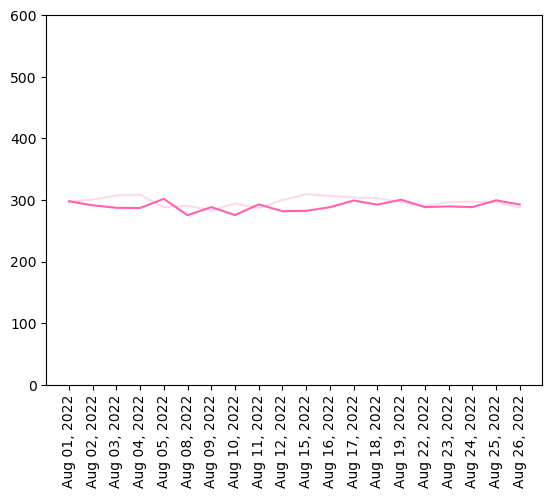

In [78]:
plt.plot(new_df['Date'], new_df['Close*'], color='#FFD9EC', label='Close')
plt.plot(new_df['Date'], new_df['prediction'], color='#FF60AF', label='prediction')
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.show()

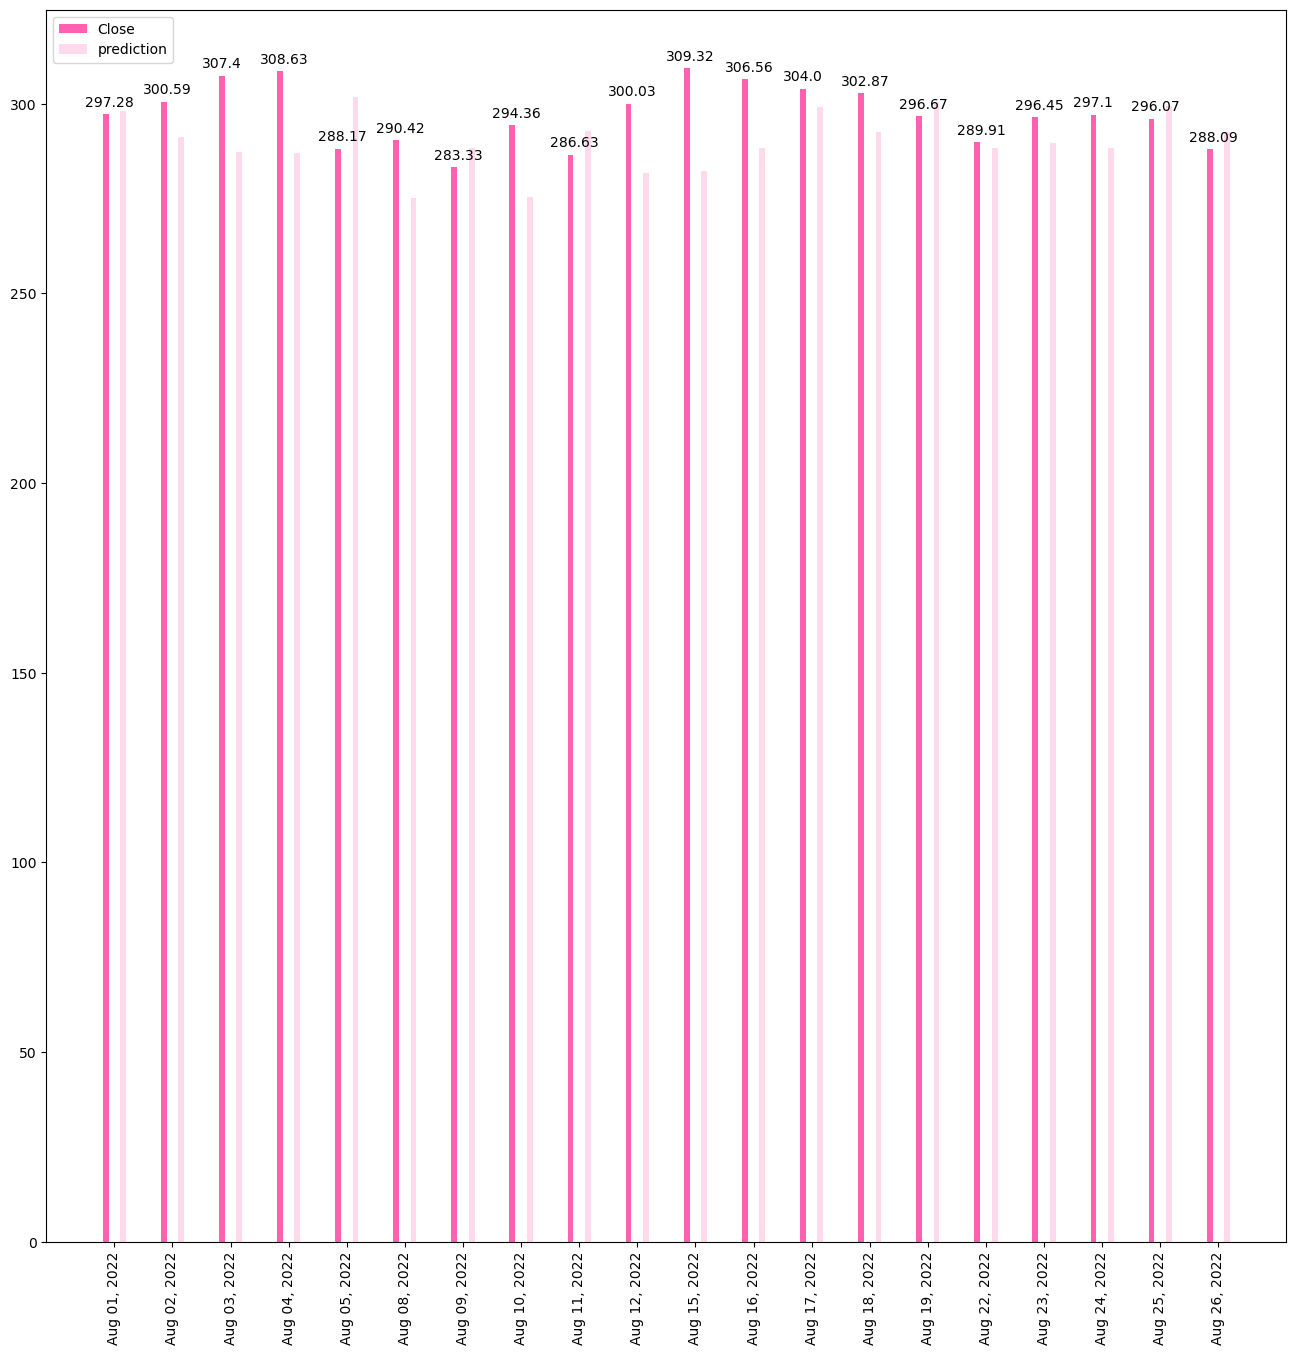

In [86]:
plt.figure(figsize=(16,16))
x = np.arange(len(new_df))
width=0.3
plt.bar(x-width/2, new_df['Close*'], color='#FF60AF', width=0.1, label='Close')
plt.bar(x+width/2, new_df['prediction'], color='#FFD9EC', width=0.1,label='prediction')
plt.xticks(x, new_df['Date'], rotation=90)
plt.legend(loc='upper left')
# plt.ylim(0,600)
# plt.bar_label(new_df['Close*'])
# plt.bar_label(new_df['prediction'])
for i,v in enumerate(new_df['Close*']):
    plt.text(i-0.5, v+2, str(v))
# for i,v in enumerate(new_df['prediction']):
#     plt.text(i-0.2, v+2, str(v))
plt.show()

In [87]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [88]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 6, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [90]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [92]:
model.fit(X_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
19/19 [==============================] - 3s 8ms/step - loss: 0.6061
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2916
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2210
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2372
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2400
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2420
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2203
Epoch 8/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2436
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2407
Epoch 10/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2310


In [95]:
prediction=model.predict(X_test)
prediction=scaler.inverse_transform(prediction)
prediction

array([[257.67404],
       [259.48654],
       [263.1315 ],
       [269.8229 ],
       [274.96848],
       [279.06436],
       [279.4047 ],
       [278.84555],
       [277.09714],
       [273.53842],
       [270.07254],
       [271.40656],
       [273.1845 ],
       [277.00528],
       [278.99615],
       [282.4643 ],
       [282.47476],
       [279.98282],
       [277.83817],
       [276.14087]], dtype=float32)

In [97]:
new_df=df[training_len:]
new_df['prediction']=prediction
new_df

/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Close*,prediction
79,"Aug 01, 2022",297.28,257.674042
80,"Aug 02, 2022",300.59,259.486542
81,"Aug 03, 2022",307.40,263.131500
82,"Aug 04, 2022",308.63,269.822906
83,"Aug 05, 2022",288.17,274.968475
84,"Aug 08, 2022",290.42,279.064362
85,"Aug 09, 2022",283.33,279.404694
86,"Aug 10, 2022",294.36,278.845551
87,"Aug 11, 2022",286.63,277.097137
88,"Aug 12, 2022",300.03,273.538422


In [98]:
new_df=new_df.reset_index(drop=True)
new_df

,Date,Close*,prediction
0,"Aug 01, 2022",297.28,257.674042
1,"Aug 02, 2022",300.59,259.486542
2,"Aug 03, 2022",307.40,263.131500
3,"Aug 04, 2022",308.63,269.822906
4,"Aug 05, 2022",288.17,274.968475
5,"Aug 08, 2022",290.42,279.064362
6,"Aug 09, 2022",283.33,279.404694
7,"Aug 10, 2022",294.36,278.845551
8,"Aug 11, 2022",286.63,277.097137
9,"Aug 12, 2022",300.03,273.538422


In [104]:
new_df['Close*']=new_df['Close*'].apply(pd.to_numeric)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        20 non-null     object 
 1   Close*      20 non-null     float64
 2   prediction  20 non-null     float32
dtypes: float32(1), float64(1), object(1)
memory usage: 528.0+ bytes


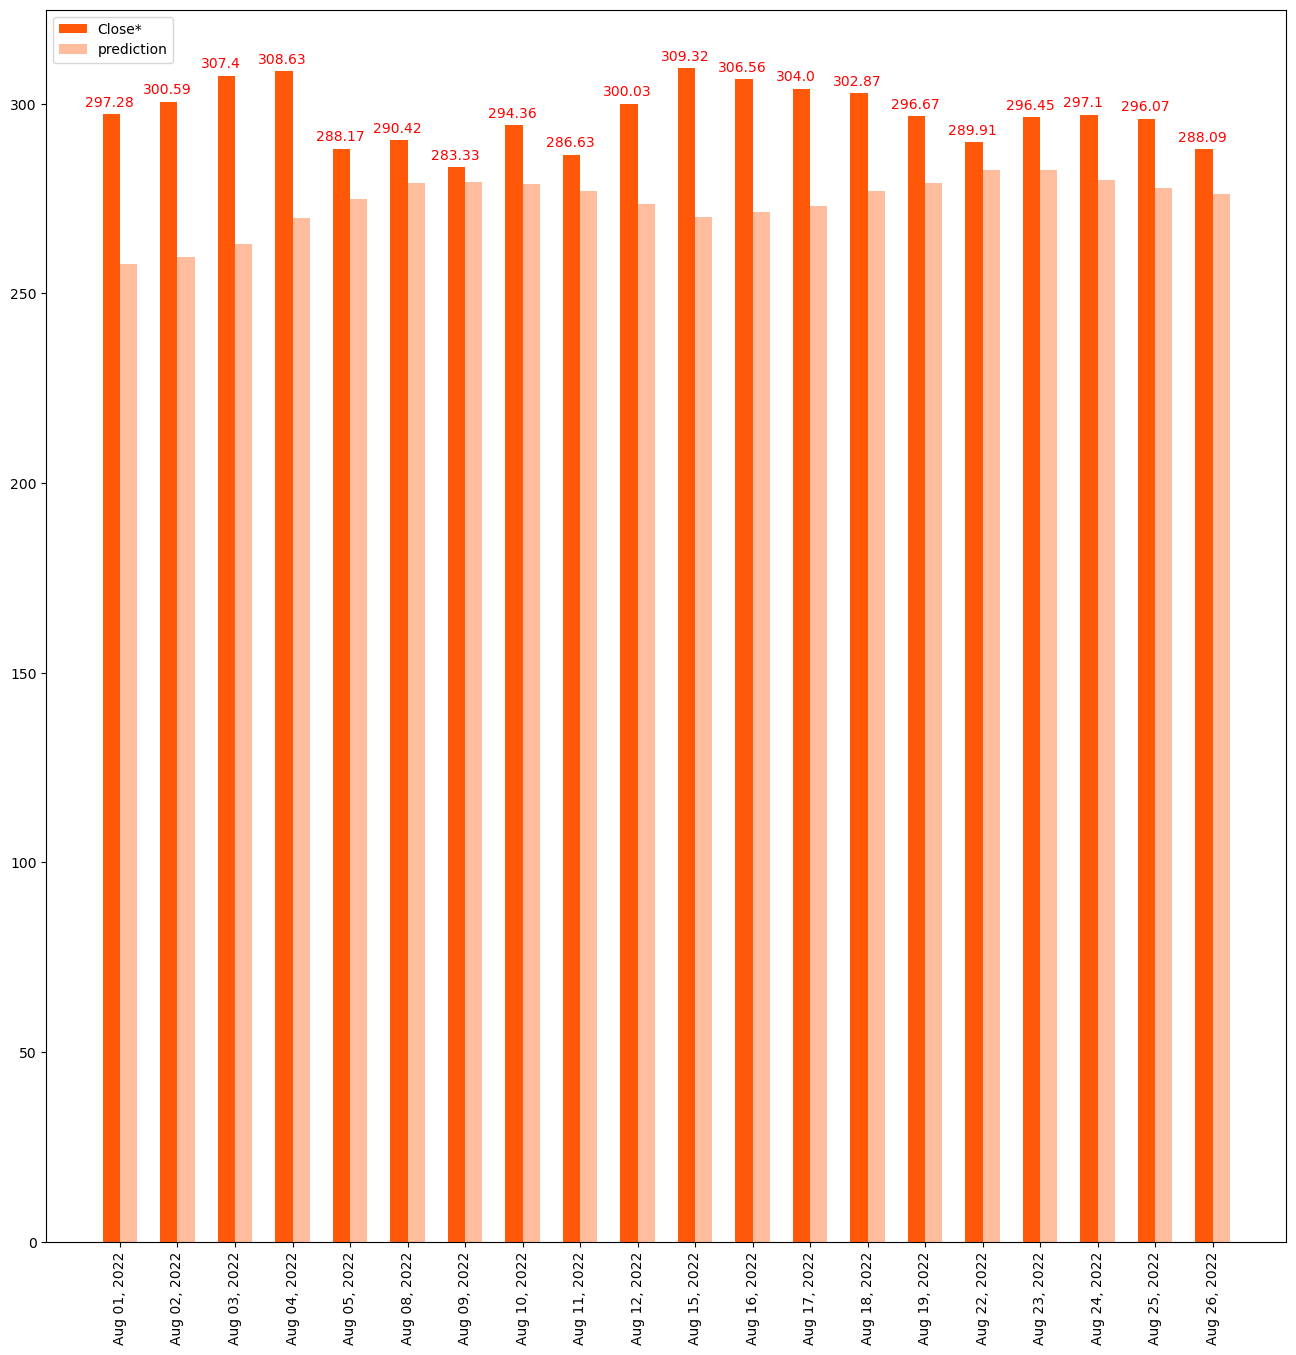

In [117]:
plt.figure(figsize=(16,16))
x=np.arange(len(new_df))
width=0.3
plt.bar(x-width/2, new_df['Close*'],  width=0.3 ,color='#FF5809', label='Close*')
plt.bar(x+width/2, new_df['prediction'], width=0.3 ,color='#FFBD9D', label='prediction')
plt.xticks(x,new_df['Date'], rotation=90)
plt.legend(loc='upper left')
for i,v in enumerate(new_df['Close*']):
    plt.text(i-0.6, v+2, str(v), color='red')
plt.show()